In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import folium

In [10]:
chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=12)


for index, row in data.iterrows():
    station_name = row['start_station_name']
    station_lat = row['start_lat']
    station_lng = row['start_lng']
    
    folium.Marker(
        location=[station_lat, station_lng],
        popup=station_name
    ).add_to(chicago_map)

chicago_map.save('bike_sharing_stations.html')

KeyboardInterrupt: 

In [7]:
data.columns

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [9]:



data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

data['ride_month'] = data['started_at'].dt.to_period('M')


- **ride_id** : the identification number for ride from start station to end station in given time
- **rideable_type** : cyclistic company bike type, there are 3 bike type classic bike, docked bike, and electric bike
- **started_at** : date and time when the ride begin
- **ended_at** : date and time when the ride end
- **day** : day name when the ride begin
- **start_station_name** : the name of the station where the ride begin
- **start_station_id** : the id of start station
- **end_station_name** : the name of the station where the ride end
- **end_station_id** : the id of end station
- **member_casual** : the riders type in cyclistic company
- **start_lat** : latitude of the start station
- **start_lng** : longitude of the start station
- **end_lat** : latitude of the end station
- **end_lng** : longitude of the end station

In [6]:


data1 = pd.read_csv('April2023.csv')
data2 = pd.read_csv('Mei2023.csv')
data3 = pd.read_csv('Juni2023.csv')

data = pd.concat([data1, data2, data3])
data

data.head()

ride_id  rideable_type           started_at             ended_at  \
0  8FE8F7D9C10E88C7  electric_bike  2023-04-02 08:37:28  2023-04-02 08:41:37   
1  34E4ED3ADF1D821B  electric_bike  2023-04-19 11:29:02  2023-04-19 11:52:12   
2  5296BF07A2F77CB5  electric_bike  2023-04-19 08:41:22  2023-04-19 08:43:22   
3  40759916B76D5D52  electric_bike  2023-04-19 13:31:30  2023-04-19 13:35:09   
4  77A96F460101AC63  electric_bike  2023-04-19 12:05:36  2023-04-19 12:10:26   

  start_station_name start_station_id end_station_name end_station_id  \
0                NaN              NaN              NaN            NaN   
1                NaN              NaN              NaN            NaN   
2                NaN              NaN              NaN            NaN   
3                NaN              NaN              NaN            NaN   
4                NaN              NaN              NaN            NaN   

   start_lat  start_lng  end_lat  end_lng member_casual  
0      41.80     -87.60    41.79   -87.60        member  
1      41.87     -87.65    41.93   -87.68        member  
2      41.93     -87.66    41.93   -87.66        member  
3      41.92     -87.65    41.91   -87.65        member  
4      41.91     -87.65    41.91   -87.63        member

In [102]:
cols = ['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name','end_station_id','start_lat','start_lng','end_lat','end_lng','member_casual']
pd.DataFrame({
    'data_type': data[cols].dtypes.values,
    'null_value': data[cols].isna().sum(),
    'n_unique': data[cols].nunique().values,
    'sample_unique': [data[col].unique() for col in cols]}
)

data_type  null_value  n_unique  \
ride_id                     object           0   1407774   
rideable_type               object           0         3   
started_at          datetime64[ns]           0   1206073   
ended_at            datetime64[ns]           0   1211203   
start_station_name          object           0      1495   
start_station_id            object           0      1297   
end_station_name            object           0      1536   
end_station_id              object           0      1313   
start_lat                  float64           0    337734   
start_lng                  float64           0    326380   
end_lat                    float64           0      3765   
end_lng                    float64           0      3764   
member_casual               object           0         2   

                                                        sample_unique  
ride_id             [5B6500E1E58655C0, AA65D25D69AF771F, 079FB2C19...  
rideable_type              [classic_bike, electric_bike, docked_bike]  
started_at          [2023-04-10 17:34:35, 2023-04-12 12:29:46, 202...  
ended_at            [2023-04-10 18:02:36, 2023-04-12 12:54:00, 202...  
start_station_name  [Avenue O & 134th St, Cottage Grove Ave & 51st...  
start_station_id    [20214, TA1309000067, TA1306000002, 13256, 130...  
end_station_name    [Avenue O & 134th St, Cottage Grove Ave & 51st...  
end_station_id      [20214, TA1309000067, TA1306000002, 13084, 132...  
start_lat           [41.65186780228521, 41.803038, 41.862429738, 4...  
start_lng           [-87.53967136144637, -87.606615, -87.651152372...  
end_lat             [41.65186780228521, 41.803038, 41.862378, 41.9...  
end_lng             [-87.53967136144637, -87.606615, -87.651062, -...  
member_casual                                        [member, casual]

In [88]:
casual_to_member = data[(data['member_casual'] == 'casual') & (data['ride_id'].isin(data[data['member_casual'] == 'member']['ride_id']))]
casual_to_member


Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual, ride_duration, day_of_week, ride_duration_hours]
Index: []

In [101]:
ride_counts = data.groupby(['member_casual', 'rideable_type']).size().unstack()

ride_counts['Conversion Rate'] = (ride_counts['member'] / (ride_counts['member'] + ride_counts['casual'])) * 100


KeyError: 'member'

In [100]:
null_data = data.isnull()
null_data

ride_id  rideable_type  started_at  ended_at  start_station_name  \
227       False          False       False     False               False   
383       False          False       False     False               False   
409       False          False       False     False               False   
561       False          False       False     False               False   
692       False          False       False     False               False   
...         ...            ...         ...       ...                 ...   
769199    False          False       False     False               False   
769200    False          False       False     False               False   
769201    False          False       False     False               False   
769202    False          False       False     False               False   
769203    False          False       False     False               False   

        start_station_id  end_station_name  end_station_id  start_lat  \
227                False             False           False      False   
383                False             False           False      False   
409                False             False           False      False   
561                False             False           False      False   
692                False             False           False      False   
...                  ...               ...             ...        ...   
769199             False             False           False      False   
769200             False             False           False      False   
769201             False             False           False      False   
769202             False             False           False      False   
769203             False             False           False      False   

        start_lng  end_lat  end_lng  member_casual  ride_duration  \
227         False    False    False          False          False   
383         False    False    False          False          False   
409         False    False    False          False          False   
561         False    False    False          False          False   
692         False    False    False          False          False   
...           ...      ...      ...            ...            ...   
769199      False    False    False          False          False   
769200      False    False    False          False          False   
769201      False    False    False          False          False   
769202      False    False    False          False          False   
769203      False    False    False          False          False   

        day_of_week  ride_duration_hours  
227           False                False  
383           False                False  
409           False                False  
561           False                False  
692           False                False  
...             ...                  ...  
769199        False                False  
769200        False                False  
769201        False                False  
769202        False                False  
769203        False                False  

[1407774 rows x 16 columns]

In [94]:
null_counts = null_data.sum()
null_counts

ride_id                0
rideable_type          0
started_at             0
ended_at               0
start_station_name     0
start_station_id       0
end_station_name       0
end_station_id         0
start_lat              0
start_lng              0
end_lat                0
end_lng                0
member_casual          0
ride_duration          0
day_of_week            0
ride_duration_hours    0
dtype: int64

In [99]:
data_duplicates = data[data.duplicated()]
data_clean = data.drop_duplicates()


In [105]:
data = data.dropna()

unique_ids = data['start_station_id'].unique()
print(pd.Series(unique_ids).to_string(index=False))
data

                              20214
                       TA1309000067
                       TA1306000002
                              13256
                              13084
                                637
                              15634
                              20106
                                361
                              20222
                                320
                                336
                              15623
                       TA1309000024
                       TA1309000041
                       TA1307000144
                              15578
                       KA1503000052
                       TA1308000013
                       TA1307000151
                       TA1307000128
                              13259
                              15654
                       TA1308000043
                                596
                       TA1307000142
                                768
                            

ride_id  rideable_type           started_at  \
227     5B6500E1E58655C0   classic_bike  2023-04-10 17:34:35   
383     AA65D25D69AF771F   classic_bike  2023-04-12 12:29:46   
409     079FB2C196414482  electric_bike  2023-04-13 17:39:23   
561     599623864C871207   classic_bike  2023-04-29 20:57:10   
692     63ECC8A13D11A76A   classic_bike  2023-04-20 17:03:11   
...                  ...            ...                  ...   
769199  7B3B2890CA85E05D   classic_bike  2022-06-25 00:56:48   
769200  1E993989CC66BCBC   classic_bike  2022-06-25 00:56:25   
769201  AEA166296BC67566  electric_bike  2022-06-12 12:47:12   
769202  B9F527742959CF03   classic_bike  2022-06-12 13:28:46   
769203  D241310352E26484   classic_bike  2022-06-12 14:40:51   

                   ended_at             start_station_name start_station_id  \
227     2023-04-10 18:02:36            Avenue O & 134th St            20214   
383     2023-04-12 12:54:00    Cottage Grove Ave & 51st St     TA1309000067   
409     2023-04-13 17:40:57           Morgan Ave & 14th Pl     TA1306000002   
561     2023-04-29 20:57:13    Cottage Grove Ave & 51st St     TA1309000067   
692     2023-04-20 17:24:58   California Ave & Division St            13256   
...                     ...                            ...              ...   
769199  2022-06-25 01:01:39   Sheffield Ave & Kingsbury St            13154   
769200  2022-06-25 01:00:26   Sheffield Ave & Kingsbury St            13154   
769201  2022-06-12 12:47:36  Milwaukee Ave & Fullerton Ave              428   
769202  2022-06-12 13:53:11         Clark St & Randolph St     TA1305000030   
769203  2022-06-12 15:08:14      Blue Island Ave & 18th St            13135   

                      end_station_name end_station_id  start_lat  start_lng  \
227                Avenue O & 134th St          20214  41.651868 -87.539671   
383        Cottage Grove Ave & 51st St   TA1309000067  41.803038 -87.606615   
409               Morgan Ave & 14th Pl   TA1306000002  41.862430 -87.651152   
561        Cottage Grove Ave & 51st St   TA1309000067  41.803038 -87.606615   
692     California Ave & Milwaukee Ave          13084  41.903029 -87.697474   
...                                ...            ...        ...        ...   
769199    Sheffield Ave & Kingsbury St          13154  41.910522 -87.653106   
769200    Sheffield Ave & Kingsbury St          13154  41.910522 -87.653106   
769201   Milwaukee Ave & Fullerton Ave            428  41.920000 -87.700000   
769202          Clark St & Randolph St   TA1305000030  41.884576 -87.631890   
769203       Blue Island Ave & 18th St          13135  41.857556 -87.661535   

          end_lat    end_lng member_casual  
227     41.651868 -87.539671        member  
383     41.803038 -87.606615        member  
409     41.862378 -87.651062        member  
561     41.803038 -87.606615        member  
692     41.922695 -87.697153        casual  
...           ...        ...           ...  
769199  41.910522 -87.653106        member  
769200  41.910522 -87.653106        member  
769201  41.920000 -87.700000        casual  
769202  41.884576 -87.631890        casual  
769203  41.857556 -87.661535        casual  

[1407774 rows x 13 columns]

In [106]:
data = data.dropna()

unique_ids = data['start_station_name'].unique()
print(pd.Series(unique_ids).to_string(index=False))

                               Avenue O & 134th St
                       Cottage Grove Ave & 51st St
                              Morgan Ave & 14th Pl
                      California Ave & Division St
                    California Ave & Milwaukee Ave
                             Wood St & Chicago Ave
                           Western Ave & Roscoe St
                          Chicago State University
                              Kenosha & Wellington
                       Burnham Greenway & 105th St
                                  Orange & Addison
                     La Villita Park (Albany/30th)
                       Campbell Ave & Montrose Ave
                            Clark St & Schiller St
                        Sheridan Rd & Lawrence Ave
           Wolcott (Ravenswood) Ave & Montrose Ave
                              Broadway & Ridge Ave
                               Ellis Ave & 53rd St
                           Halsted St & Archer Ave
                             We

In [107]:
data = data.dropna()

unique_ids = data['end_station_id'].unique()
print(pd.Series(unique_ids).to_string(index=False))

                               20214
                        TA1309000067
                        TA1306000002
                               13084
                               13256
                                 637
                               15634
                               20106
                                 361
                               20222
                                 320
                                 336
                               15623
                              LF-005
                        TA1309000041
                        TA1309000024
                        TA1307000144
                        TA1307000126
                        TA1307000128
                        TA1308000021
                        KA1504000151
                               13008
                        TA1309000055
                               13430
                               13242
                               15653
                                 604
 

In [108]:
data = data.dropna()

unique_ids = data['end_station_name'].unique()
print(pd.Series(unique_ids).to_string(index=False))

                               Avenue O & 134th St
                       Cottage Grove Ave & 51st St
                              Morgan Ave & 14th Pl
                    California Ave & Milwaukee Ave
                      California Ave & Division St
                             Wood St & Chicago Ave
                           Western Ave & Roscoe St
                          Chicago State University
                              Kenosha & Wellington
                       Burnham Greenway & 105th St
                                  Orange & Addison
                     La Villita Park (Albany/30th)
                       Campbell Ave & Montrose Ave
                DuSable Lake Shore Dr & North Blvd
                        Sheridan Rd & Lawrence Ave
                            Clark St & Schiller St
           Wolcott (Ravenswood) Ave & Montrose Ave
                      Sheffield Ave & Waveland Ave
                       Dearborn Pkwy & Delaware Pl
                       Winthrop

In [109]:
start_station_ids = data['start_station_id']

pattern = '[a-zA-Z]'

mask = start_station_ids.str.contains(pattern)

id_with_alphabet = start_station_ids[mask].unique()
id_without_alphabet = start_station_ids[~mask].unique()

print('IDs with alphabet:', len(id_with_alphabet))
print('IDs without alphabet:', len(id_without_alphabet))

IDs with alphabet: 308
IDs without alphabet: 989


In [110]:
end_station_ids = data['end_station_id']

pattern = '[a-zA-Z]'

mask = start_station_ids.str.contains(pattern)

id_with_alphabet = start_station_ids[mask].unique()
id_without_alphabet = start_station_ids[~mask].unique()

print('IDs with alphabet:', len(id_with_alphabet))
print('IDs without alphabet:', len(id_without_alphabet))

IDs with alphabet: 308
IDs without alphabet: 989


ValueError: min() arg is an empty sequence

In [111]:
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 1407774 entries, 227 to 769203
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1407774 non-null  object 
 1   rideable_type       1407774 non-null  object 
 2   started_at          1407774 non-null  object 
 3   ended_at            1407774 non-null  object 
 4   start_station_name  1407774 non-null  object 
 5   start_station_id    1407774 non-null  object 
 6   end_station_name    1407774 non-null  object 
 7   end_station_id      1407774 non-null  object 
 8   start_lat           1407774 non-null  float64
 9   start_lng           1407774 non-null  float64
 10  end_lat             1407774 non-null  float64
 11  end_lng             1407774 non-null  float64
 12  member_casual       1407774 non-null  object 
dtypes: float64(4), object(9)
memory usage: 150.4+ MB


start_lat     start_lng       end_lat       end_lng
count  1.407774e+06  1.407774e+06  1.407774e+06  1.407774e+06
mean   4.190248e+01 -8.764490e+01  4.190297e+01 -8.764516e+01
std    4.259386e-02  2.525090e-02  4.275298e-02  2.541443e-02
min    4.164850e+01 -8.784000e+01  4.164850e+01 -8.784000e+01
25%    4.188126e+01 -8.765842e+01  4.188169e+01 -8.765862e+01
50%    4.189768e+01 -8.764179e+01  4.189859e+01 -8.764275e+01
75%    4.192888e+01 -8.762788e+01  4.192914e+01 -8.762858e+01
max    4.206485e+01 -8.752531e+01  4.206485e+01 -8.752823e+01

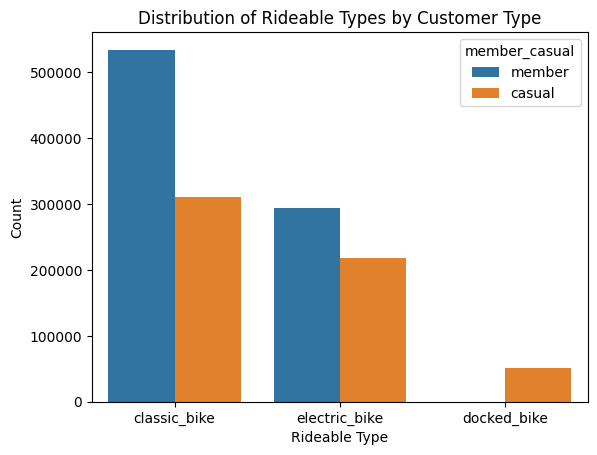

In [112]:
sns.countplot(data=data, x='rideable_type', hue='member_casual')
plt.title('Distribution of Rideable Types by Customer Type')
plt.xlabel('Rideable Type')
plt.ylabel('Count')
plt.show()


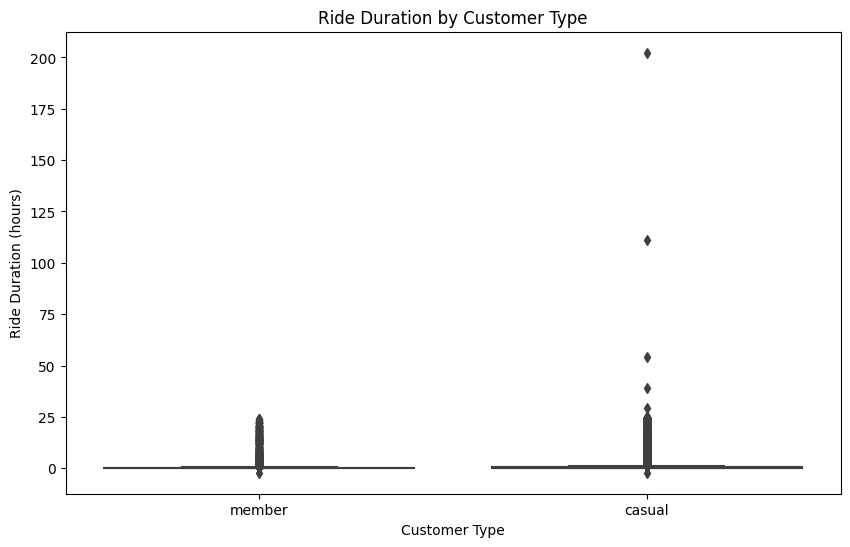

In [113]:
data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])
data['ride_duration'] = (data['ended_at'] - data['started_at']).dt.total_seconds() / 3600  # Duration in hours

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='member_casual', y='ride_duration')
plt.title('Ride Duration by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Ride Duration (hours)')
plt.show()


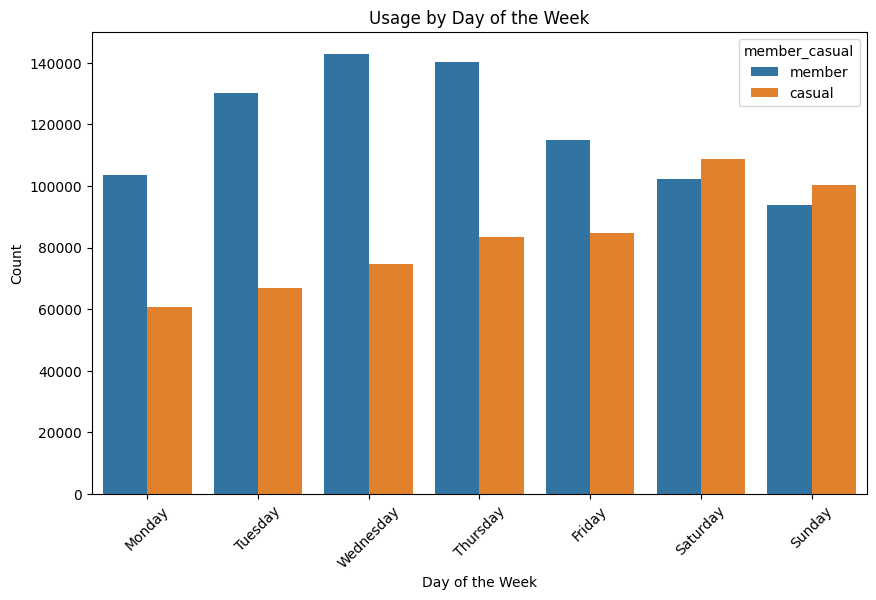

In [114]:
data['day_of_week'] = data['started_at'].dt.day_name()

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='day_of_week', hue='member_casual', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Usage by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


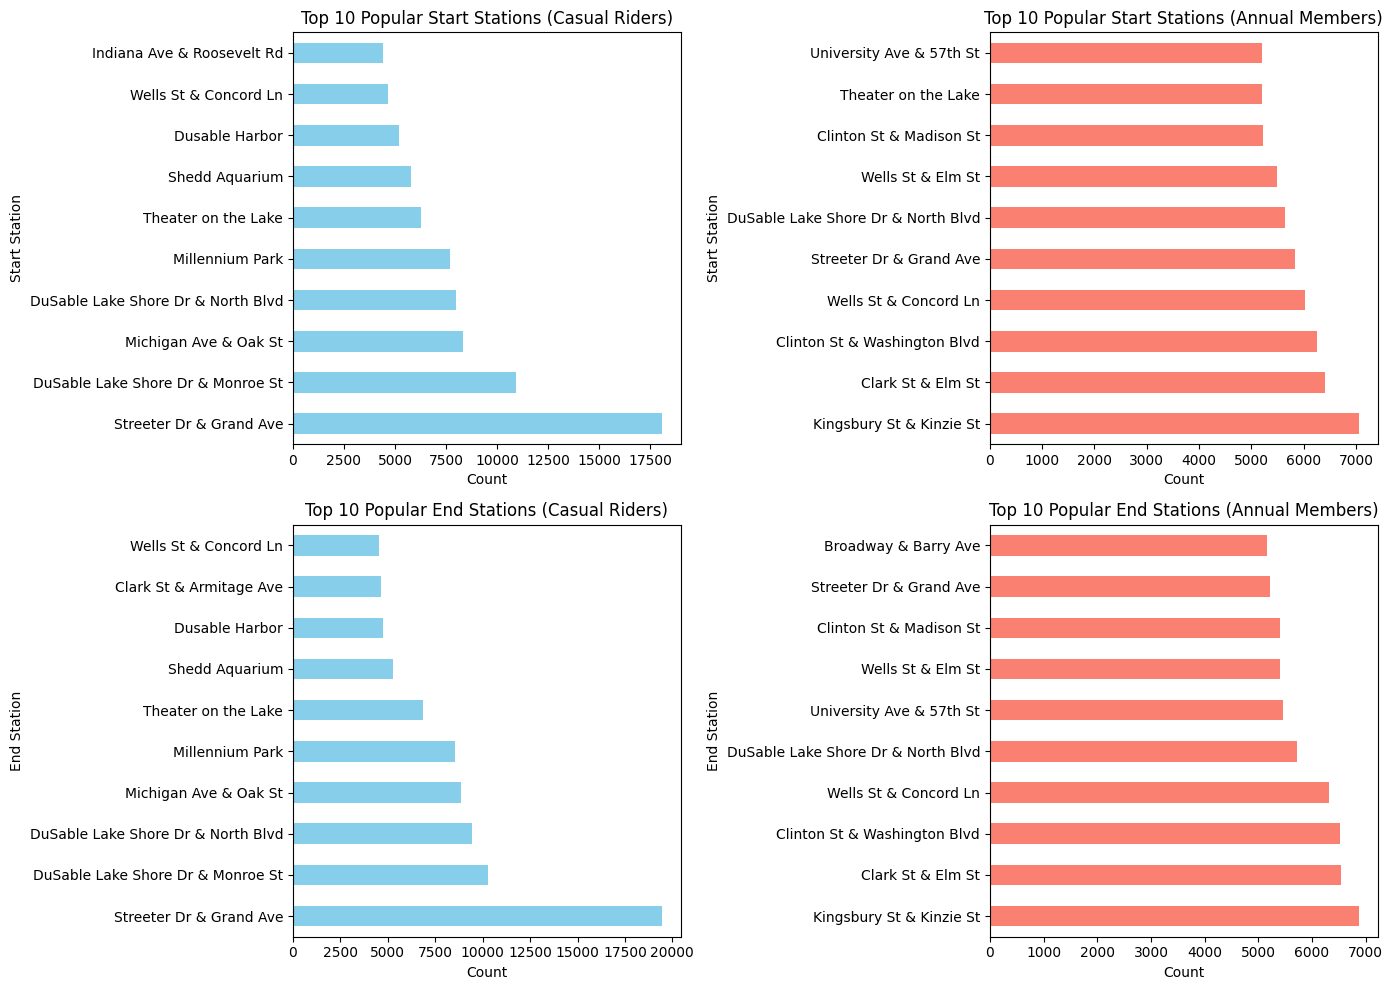

In [115]:
casual_start_stations = data[data['member_casual'] == 'casual']['start_station_name'].value_counts().head(10)
member_start_stations = data[data['member_casual'] == 'member']['start_station_name'].value_counts().head(10)

casual_end_stations = data[data['member_casual'] == 'casual']['end_station_name'].value_counts().head(10)
member_end_stations = data[data['member_casual'] == 'member']['end_station_name'].value_counts().head(10)

plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
casual_start_stations.plot(kind='barh', color='skyblue')
plt.title('Top 10 Popular Start Stations (Casual Riders)')
plt.xlabel('Count')
plt.ylabel('Start Station')

plt.subplot(2, 2, 2)
member_start_stations.plot(kind='barh', color='salmon')
plt.title('Top 10 Popular Start Stations (Annual Members)')
plt.xlabel('Count')
plt.ylabel('Start Station')

plt.subplot(2, 2, 3)
casual_end_stations.plot(kind='barh', color='skyblue')
plt.title('Top 10 Popular End Stations (Casual Riders)')
plt.xlabel('Count')
plt.ylabel('End Station')

plt.subplot(2, 2, 4)
member_end_stations.plot(kind='barh', color='salmon')
plt.title('Top 10 Popular End Stations (Annual Members)')
plt.xlabel('Count')
plt.ylabel('End Station')

plt.tight_layout()
plt.show()


In [79]:

data['started_at'] = pd.to_datetime(data['started_at'])
data['ended_at'] = pd.to_datetime(data['ended_at'])

data['ride_duration_hours'] = (data['ended_at'] - data['started_at']).dt.total_seconds() / 3600
data



ride_id  rideable_type          started_at  \
227     5B6500E1E58655C0   classic_bike 2023-04-10 17:34:35   
383     AA65D25D69AF771F   classic_bike 2023-04-12 12:29:46   
409     079FB2C196414482  electric_bike 2023-04-13 17:39:23   
561     599623864C871207   classic_bike 2023-04-29 20:57:10   
692     63ECC8A13D11A76A   classic_bike 2023-04-20 17:03:11   
...                  ...            ...                 ...   
769199  7B3B2890CA85E05D   classic_bike 2022-06-25 00:56:48   
769200  1E993989CC66BCBC   classic_bike 2022-06-25 00:56:25   
769201  AEA166296BC67566  electric_bike 2022-06-12 12:47:12   
769202  B9F527742959CF03   classic_bike 2022-06-12 13:28:46   
769203  D241310352E26484   classic_bike 2022-06-12 14:40:51   

                  ended_at             start_station_name start_station_id  \
227    2023-04-10 18:02:36            Avenue O & 134th St            20214   
383    2023-04-12 12:54:00    Cottage Grove Ave & 51st St     TA1309000067   
409    2023-04-13 17:40:57           Morgan Ave & 14th Pl     TA1306000002   
561    2023-04-29 20:57:13    Cottage Grove Ave & 51st St     TA1309000067   
692    2023-04-20 17:24:58   California Ave & Division St            13256   
...                    ...                            ...              ...   
769199 2022-06-25 01:01:39   Sheffield Ave & Kingsbury St            13154   
769200 2022-06-25 01:00:26   Sheffield Ave & Kingsbury St            13154   
769201 2022-06-12 12:47:36  Milwaukee Ave & Fullerton Ave              428   
769202 2022-06-12 13:53:11         Clark St & Randolph St     TA1305000030   
769203 2022-06-12 15:08:14      Blue Island Ave & 18th St            13135   

                      end_station_name end_station_id  start_lat  start_lng  \
227                Avenue O & 134th St          20214  41.651868 -87.539671   
383        Cottage Grove Ave & 51st St   TA1309000067  41.803038 -87.606615   
409               Morgan Ave & 14th Pl   TA1306000002  41.862430 -87.651152   
561        Cottage Grove Ave & 51st St   TA1309000067  41.803038 -87.606615   
692     California Ave & Milwaukee Ave          13084  41.903029 -87.697474   
...                                ...            ...        ...        ...   
769199    Sheffield Ave & Kingsbury St          13154  41.910522 -87.653106   
769200    Sheffield Ave & Kingsbury St          13154  41.910522 -87.653106   
769201   Milwaukee Ave & Fullerton Ave            428  41.920000 -87.700000   
769202          Clark St & Randolph St   TA1305000030  41.884576 -87.631890   
769203       Blue Island Ave & 18th St          13135  41.857556 -87.661535   

          end_lat    end_lng member_casual  ride_duration day_of_week  \
227     41.651868 -87.539671        member       0.466944      Monday   
383     41.803038 -87.606615        member       0.403889   Wednesday   
409     41.862378 -87.651062        member       0.026111    Thursday   
561     41.803038 -87.606615        member       0.000833    Saturday   
692     41.922695 -87.697153        casual       0.363056    Thursday   
...           ...        ...           ...            ...         ...   
769199  41.910522 -87.653106        member       0.080833    Saturday   
769200  41.910522 -87.653106        member       0.066944    Saturday   
769201  41.920000 -87.700000        casual       0.006667      Sunday   
769202  41.884576 -87.631890        casual       0.406944      Sunday   
769203  41.857556 -87.661535        casual       0.456389      Sunday   

        ride_duration_hours  
227                0.466944  
383                0.403889  
409                0.026111  
561                0.000833  
692                0.363056  
...                     ...  
769199             0.080833  
769200             0.066944  
769201             0.006667  
769202             0.406944  
769203             0.456389  

[1407774 rows x 16 columns]

In [80]:
data = data.dropna()

unique_ids = data['start_lat'].unique()
print(pd.Series(unique_ids).to_string(index=False))

41.651868
41.803038
41.862430
41.903029
41.922688
41.862378
41.922695
41.895610
41.802992
41.862454
41.943034
41.903034
41.718984
41.718925
41.930000
41.704575
41.903034
41.922618
41.803024
41.903008
41.862444
41.922682
41.922691
41.862437
41.902990
41.719011
41.718963
41.895634
41.943117
41.718991
41.719012
41.895628
41.940000
41.895646
41.840000
41.922662
41.862416
41.862445
41.718948
41.718947
41.922746
41.895656
41.862402
41.895564
41.903043
41.803065
41.961524
41.922674
41.922733
41.895547
41.922659
41.922683
41.903050
41.803026
41.907993
41.969460
41.961428
41.908138
41.961437
41.908122
41.984054
41.799336
41.847203
41.889941
41.898969
41.918491
41.902707
41.830704
41.830661
42.048214
41.908027
41.907969
42.048244
41.908035
42.048264
42.048186
41.931248
41.898993
41.969499
41.908077
41.969575
41.969533
41.961406
41.969517
41.800000
41.907695
41.969504
41.969417
41.907990
41.907994
41.969465
41.907961
42.012132
42.048266
41.968920
41.968812
41.949252
41.984075
41.946636
41.915983


jawaban
 jadi menurut data yang ditemukan untuk menarik jumlah pengguna kasual ke member adalah dengan salah satu method yaitu meningkatkan jumlah sepeda jenis docked dan elektrik karena kedua sepeda ini mampu menarik pengguna kasual yang lumayan banyak yang nantinya juga mampu meningkatkan pengguna member. lalu akan lebihh baik kalau diadakan sebuah acara atau kegiatan dimana banyak pengguna member bisa bertemu dengan pengguna kasual. dalam hal ini kita akan mencoba mempertemukan kedua dalam waktu weekend dan karena pengguna casual mencapai puncaknya pada weekend dan juga diadakan di tempat di mana kedua jenis pesepeda itu bisa sering ditemui yaitu Streeter Dr and grand Ave, Wells street dan Concord LN, dan theater on the lake.

anomali
dalam pembersihan data yang kami menemukan beberapa kejanggalan data di casual biker dimana beberapa pengguna menggunakan sepeda di atas rata-rata penggunaan normal. Untuk saat ini, kami belum bisa menemukan kesimpulan yang tepat jadi kami asumsikan bahwa pengguna tersebut lupa mengembalikan sepeda atau terjadi kesalahan pencatatan data oleh admin 

tambahan
perlu dilakukan penelitian kepada pengguna member yaitu alasan kenapa mereka memutuskan menjadi pengguna member ketimbang kasual. contoh yang bisa dipakai adalah:
1. apakah member memiliki hobi seperti sepedaan?
2. apakah member memiliki ideologi tertentu seperti pecinta green movement? 
3. apakah member memiliki jarak rumah yang dekat dengan tempat tertentu ( kerja, nongkrong, keluarga dll)
4. apakah member termasuk atau memiliki komunitas tertentu yang berhubungan dengan bersepeda atau bisa menunjang kegiatan bersepeda
5. tingkat pendapatan member dan harga-harga sepeda yang dijual dimana ini merangkup ketiga jenis sepeda tersebut?
6. brand sepeda yang paling laris?
7. toko sepeda yang berada di area tersebut?